In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
class Hopfield:
    def __init__(self, input_size = 32, number_of_classes = 10):
        self.P = number_of_classes
        self.N = input_size
        self.sqrt_N = int(np.sqrt(input_size))
    def Train(self, x, type='Menhaj'):
        if type == 'Menhaj':
            self.weight = (np.expand_dims(x, -1) + np.expand_dims(x, 1)).prod(0)
            self.weight = self.weight/2**self.P
            self.weight = self.weight.T*self.weight
        elif type == 'Hebb':
            self.weight = np.mean(np.expand_dims(x, -1) * np.expand_dims(x, 1), 0)
        elif type == 'WTA':
            self.weight = np.sum((2*np.expand_dims(x, -1)-1) * (2*np.expand_dims(x, 1)-1), 0)
        self.weight = self.weight*(np.ones(self.weight.shape)-np.eye(self.N))
    def forward(self, x):
        y = self.weight@np.expand_dims(x,-1)
        return np.where(y.reshape(self.sqrt_N, self.sqrt_N)<1, 0, 1)

# Example 1

In [14]:
# N = 32
P = 10

x = []
for i in range(P):
    img = cv2.imread('digits/'+str(i)+'.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary_image = np.where(img_gray<128, -1, 1)
    x.append(binary_image)
x = np.asarray(x).reshape([P,-1])

N = x.shape[1]

In [15]:
# model_Hebb.weight

In [16]:
model_WTA = Hopfield(N, P)
model_WTA.Train(x, type = 'WTA')
model_Hebb = Hopfield(N, P)
model_Hebb.Train(x, type = 'Hebb')
model_Menhaj = Hopfield(N, P)
model_Menhaj.Train(x, type = 'Menhaj')

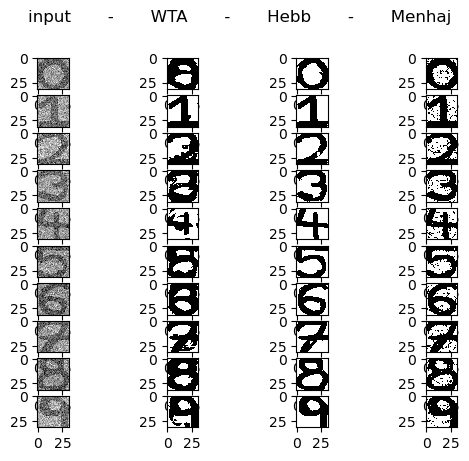

In [17]:
plt.figure()
for i in range(P):
    noise = np.random.normal(0,1,x.shape[1])
    y = x[i] + noise
    plt.subplot(P,4,i*4+1)
    plt.imshow(y.reshape([32,32]), cmap='gray')
    plt.subplot(P,4,i*4+2)
    y_hat_WTA = model_WTA.forward(y)
    plt.imshow(y_hat_WTA, cmap='gray')
    plt.subplot(P,4,i*4+3)
    y_hat_Hebb = model_Hebb.forward(y)
    plt.imshow(y_hat_Hebb, cmap='gray')
    plt.subplot(P,4,i*4+4)
    y_hat_Menhaj = model_Menhaj.forward(y)
    plt.imshow(y_hat_Menhaj, cmap='gray')
plt.suptitle('input       -       WTA       -       Hebb       -       Menhaj')
plt.savefig('Example1.png', dpi = 1000)

# Example 2

In [18]:
P = 10

x = []
for i in range(P):
    img = cv2.imread('names/'+str(i)+'.jpg')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary_image = np.where(img_gray<128, -1, 1)
    x.append(binary_image)
x = np.asarray(x).reshape([P,-1])

N = x.shape[1]

In [19]:
model_WTA = Hopfield(N, P)
model_WTA.Train(x, type = 'WTA')
model_Hebb = Hopfield(N, P)
model_Hebb.Train(x, type = 'Hebb')
model_Menhaj = Hopfield(N, P)
model_Menhaj.Train(x, type = 'Menhaj')

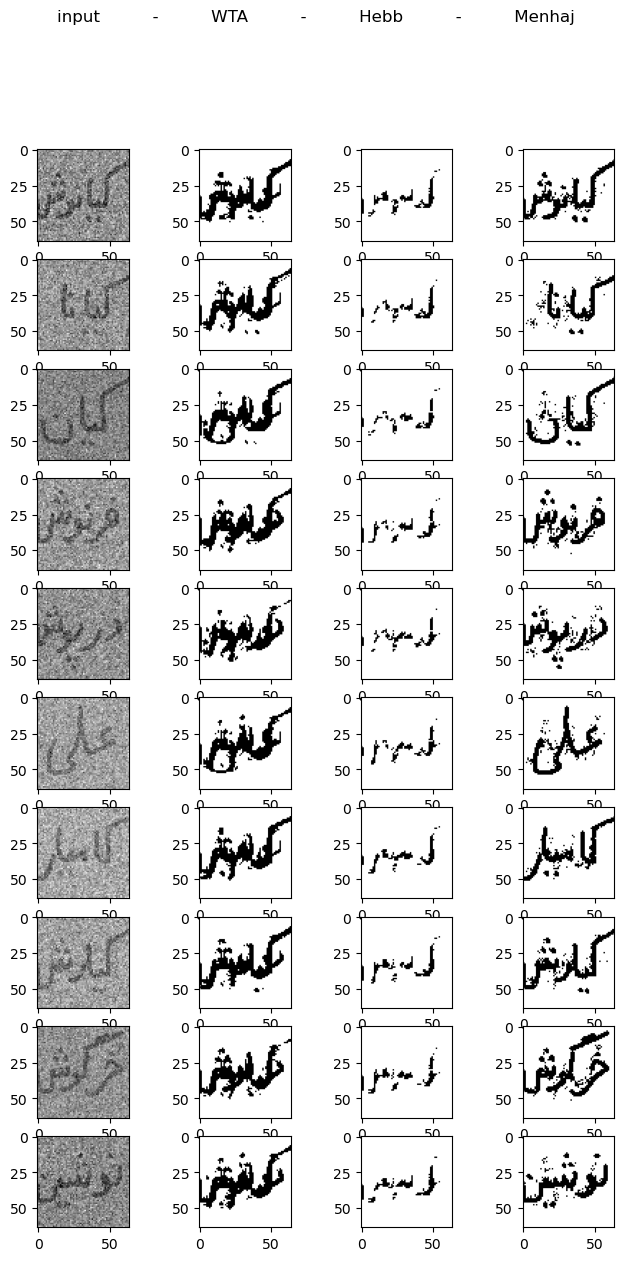

In [25]:
plt.figure(figsize=(8,14))
for i in range(P):
    noise = np.random.normal(0,1,x.shape[1])
    y = x[i] + noise
    plt.subplot(P,4,i*4+1)
    plt.imshow(y.reshape([64,64]), cmap='gray')
    plt.subplot(P,4,i*4+2)
    y_hat_WTA = model_WTA.forward(y)
    plt.imshow(y_hat_WTA, cmap='gray')
    plt.subplot(P,4,i*4+3)
    y_hat_Hebb = model_Hebb.forward(y)
    plt.imshow(y_hat_Hebb, cmap='gray')
    plt.subplot(P,4,i*4+4)
    y_hat_Menhaj = model_Menhaj.forward(y)
    plt.imshow(y_hat_Menhaj, cmap='gray')
plt.suptitle('input          -          WTA          -          Hebb          -          Menhaj')
plt.savefig('Example2.png', dpi = 1000)